# Table of Contents

1. [Neural Networks](#nn)
    1. [Visualizing the data](#viz)
    2. [Model representation](#nn-model)
    3. [Feedforward and cost function](#feedforward)
    4. [Regularized cost function](#reg-cost)
2. [Backpropagation](#backprop)
    1. [Sigmoid gradient](#gradient)
    2. [Random initialization](#initialization)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.io import loadmat
%matplotlib inline

In [2]:
input_layer_size  = 400
hidden_layer_size = 25
num_labels = 10

<div id='nn'/>

## 1. Neural Networks

<div id='viz'/>

### 1.1 Visualizing the data

In [4]:
# import the data set
data_directory = '../../../Documents/Machine-Learning/Week 5/01. Data/'
file = 'ex4data1.mat'

mat = loadmat(data_directory+file)

In [6]:
# convert to Pandas data frame

examples = mat['X']
target = mat['y']

df = pd.DataFrame(np.concatenate([examples, target], axis=1))

# add a column of ones for the intercept
df.insert(0, 'int', 1)

In [7]:
df.head()

,int,0,1,2,3,4,5,6,7,8,...,391,392,393,394,395,396,397,398,399,400
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0


In [8]:
def PlotGrid(df, dim):
    m, n = df.iloc[:,1:-1].shape

    # generate random sample from the data set to plot
    to_plot = df.iloc[:,1:-1].loc[np.random.choice(m, size=dim * dim, replace = False)]

    # visualize the numbers
    fig = plt.figure(figsize=(5, 5))

    gs = gridspec.GridSpec(dim, dim)
    gs.update(bottom=0.01, top=0.99, left=0.01, right=0.99, 
              hspace=0.05, wspace=0.05)

    indeces = list(to_plot.index.values)

    k=0

    for i in range(dim):
        for j in range(dim):
            ax = plt.subplot(gs[i, j])
            ax.axis('off')
            ax.imshow(to_plot.loc[indeces[k]].values.reshape(int(np.sqrt(n)), int(np.sqrt(n))).T,
                cmap = plt.get_cmap('Greys'), interpolation = 'nearest')
            k += 1

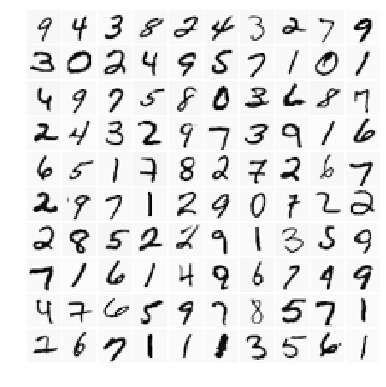

In [9]:
PlotGrid(df, 10)

<div id='nn-model'/>

### 1.2 Model representation

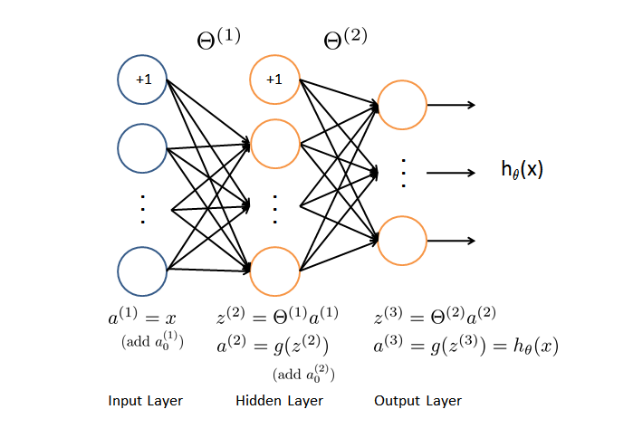

In [24]:
file = 'ex4weights.mat'

weights = loadmat(data_directory+file)

theta1 = weights['Theta1']
theta2 = weights['Theta2']

print("Theta1 has size {}. Expected size is 25x401".format(theta1.shape))
print("Theta1 has size {}. Expected size is 10x26".format(theta2.shape))

nn_params = np.append(theta1.reshape(-1,),theta2.reshape(-1,))

Theta1 has size (25, 401). Expected size is 25x401
Theta1 has size (10, 26). Expected size is 10x26


<div id='feedforward'/>

### 1.3 Feedforward and cost function

The cost funciton is defined as:

$$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K} \bigg[ -y_k^{(i)}log\big((h_{\theta}(x^{(i)}))_k\big) - (1-y_k^{(i)})log\big(1 - (h_{\theta}(x^{(i)}))_k\big)\bigg] $$

In [7]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return(g)

def nnCostFunction(nn_params,
                   input_layer_size,
                   hidden_layer_size,
                   num_labels,
                   x, y, lam):

    # Reshape nn_params back into the parameters Theta1 and Theta2, the weight matrices 
    Theta1 = nn_params[0:hidden_layer_size * (input_layer_size + 1)].reshape(hidden_layer_size, input_layer_size + 1)
    Theta2 = nn_params[hidden_layer_size * (input_layer_size + 1):].reshape(num_labels, hidden_layer_size + 1)

    m = x.shape[0]
    
    J = 0;
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)
    
    # add a column of ones to the training dataset
    x = np.c_[ np.ones((m,1)), x]
    
    z2 = x @ np.transpose(Theta1)
    x2 = np.c_[np.ones((z2.shape[0],1)), sigmoid(z2)]
    
    z3 = x2 @ np.transpose(Theta2)
    x3 = sigmoid(z3)
    
    y = np.matlib.repmat(np.arange(1,num_labels+1,1),m,1) == np.matlib.repmat(y, 1, num_labels)
    J = 1/m * ( -1*y*np.log(x3) - ((1-y)*np.log(1-x3))).sum()

    return(J)
    

In [74]:
cost_t = nnCostFunction(nn_params = nn_params,
                        input_layer_size = input_layer_size,
                        hidden_layer_size = hidden_layer_size,
                        num_labels = num_labels,
                        x = examples,
                        y = target,
                        lam = 0)

print('The test cost is {}'.format(cost_t))
print('Expected cost is 0.287629')

The test cost is 0.2876291651613189
Expected cost is 0.287629


<div id='reg-cost'/>

### 1.4 Regularized cost function

The regularized cost funciton is defined as:

$$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K} \Big[ -y_k^{(i)}log\big((h_{\theta}(x^{(i)}))_k\big) - (1-y_k^{(i)})log\big(1 - (h_{\theta}(x^{(i)}))_k\big)\Big] + \frac{\lambda}{2m}\bigg[ \sum_{j=1}^{h}\sum_{k=1}^{n}\big(\Theta_{j,k}^{(1)}\big)^2 + \sum_{j=1}^{K}\sum_{k=1}^{h}\big(\Theta_{j,k}^{(2)}\big)^2 \bigg] $$

Where $m$ is the total number of training examples, $n$ is the size of the input layer, $h$ is the hidden layer size, and $K$ is the number of labels.

In [96]:
def nnCostFunction(nn_params,
                   input_layer_size,
                   hidden_layer_size,
                   num_labels,
                   x, y, lam):

    # Reshape nn_params back into the parameters Theta1 and Theta2, the weight matrices 
    Theta1 = nn_params[0:hidden_layer_size * (input_layer_size + 1)].reshape(hidden_layer_size, input_layer_size + 1)
    Theta2 = nn_params[hidden_layer_size * (input_layer_size + 1):].reshape(num_labels, hidden_layer_size + 1)

    m = x.shape[0]
    
    J = 0;
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)
    
    # add a column of ones to the training dataset
    x = np.c_[ np.ones((m,1)), x]
    
    z2 = x @ np.transpose(Theta1)
    x2 = np.c_[np.ones((z2.shape[0],1)), sigmoid(z2)]
    
    z3 = x2 @ np.transpose(Theta2)
    x3 = sigmoid(z3)
    
    y = np.matlib.repmat(np.arange(1,num_labels+1,1),m,1) == np.matlib.repmat(y, 1, num_labels)
    
    cost = 1/m * ( -1*y*np.log(x3) - ((1-y)*np.log(1-x3))).sum()
    reg = (lam/(2*m)) * (sum(sum(np.power(Theta1[:,1:],2))) + sum(sum(np.power(Theta2[:,1:],2))))
    J = cost + reg
    return(J)


In [98]:
cost_t = nnCostFunction(nn_params = nn_params,
                        input_layer_size = input_layer_size,
                        hidden_layer_size = hidden_layer_size,
                        num_labels = num_labels,
                        x = examples,
                        y = target,
                        lam = 1)

print('The test cost is {}'.format(cost_t))
print('Expected cost is 0.383770.')

The test cost is 0.38376985909092365
Expected cost is 0.383770.


<div id='backprop'/>

## 2. Backpropagation

<div id='gradient'/>

### 2.1 Sigmoid gradient

The gradient for the sigmoid function can be computed as:

$$ g'(z) = \frac{d}{dz}g(z) = g(z)(1 - g(z))$$

where

$$ g(z) = \frac{1}{1 + e^{-z}} $$



In [4]:
asd = np.zeros(5)

asd.size

5

In [10]:
def sigmoidGradient(z):
    z = np.asarray(z)
    g = np.zeros(z.size)
    
    g = sigmoid(z) * (1-sigmoid(z))
    
    return g

In [21]:
print('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:\n{}'.format(sigmoidGradient(np.array([-1, -0.5, 0, 0.5, 1]))))

Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:
[0.19661193 0.23500371 0.25       0.23500371 0.19661193]


In [77]:
def magic(n):
    n = int(n)
    if n < 3:
        raise ValueError("Size must be at least 3")
    if n % 2 == 1:
        p = np.arange(1, n+1)
        return n*np.mod(p[:, None] + p - (n+3)//2, n) + np.mod(p[:, None] + 2*p-2, n) + 1
    elif n % 4 == 0:
        J = np.mod(np.arange(1, n+1), 4) // 2
        K = J[:, None] == J
        M = np.arange(1, n*n+1, n)[:, None] + np.arange(n)
        M[K] = n*n + 1 - M[K]
    else:
        p = n//2
        M = magic(p)
        M = np.block([[M, M+2*p*p], [M+3*p*p, M+p*p]])
        i = np.arange(p)
        k = (n-2)//4
        j = np.concatenate((np.arange(k), np.arange(n-k+1, n)))
        M[np.ix_(np.concatenate((i, i+p)), j)] = M[np.ix_(np.concatenate((i+p, i)), j)]
        M[np.ix_([k, k+p], [0, k])] = M[np.ix_([k+p, k], [0, k])]
    return M 

test = sigmoidGradient(np.concatenate((np.asarray([-1, -2, -3]).reshape(1,3), magic(3)),axis = 0))

In [78]:
print('The test output of sigmoidGradient function is:\n{}'.format(test))
print('Expected values:\n1.9661e-001, 1.0499e-001, 4.5177e-002\n3.3524e-004, 1.9661e-001, 2.4665e-003\n4.5177e-002,6.6481e-003,9.1022e-004\n1.7663e-002, 1.2338e-004,1.0499e-00')

The test output of sigmoidGradient function is:
[[1.96611933e-01 1.04993585e-01 4.51766597e-02]
 [3.35237671e-04 1.96611933e-01 2.46650929e-03]
 [4.51766597e-02 6.64805667e-03 9.10221180e-04]
 [1.76627062e-02 1.23379350e-04 1.04993585e-01]]
Expected values:
1.9661e-001, 1.0499e-001, 4.5177e-002
3.3524e-004, 1.9661e-001, 2.4665e-003
4.5177e-002,6.6481e-003,9.1022e-004
1.7663e-002, 1.2338e-004,1.0499e-00


<div id='initialization'/>

### 2.2 Random initialization

To break symmetry it is important to initialize the parameters randomly. When starting the algorithm it is good to start with values of $\Theta^{(l)}$ in the range of $[-\epsilon_0, \epsilon_0]$. A common strategy is to select a value of $\epsilon_0$ based on the number of units in the network. For example:

$$ \epsilon_0 = \frac{\sqrt{6}}{\sqrt{L_{in} + L_{out}}} $$

where $L_{in} = s_l$ and $L_{out} = s_{l+1}$ are the number of units in the layers adjacent to $\Theta^{(l)}$.

In [89]:
def randInitializeWeights(L_in, L_out, epsilon_init):
    W = np.zeros((L_out, 1 + L_in))

    W = np.random.uniform(0,1,(L_out, 1 + L_in)) * 2 * epsilon_init - epsilon_init
    
    return W